# Breast Cancer Diagnostic Using AI and ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the data set from https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
df = pd.read_csv('breast_cancer_wisconsin_diagnostic.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Data Analysis

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


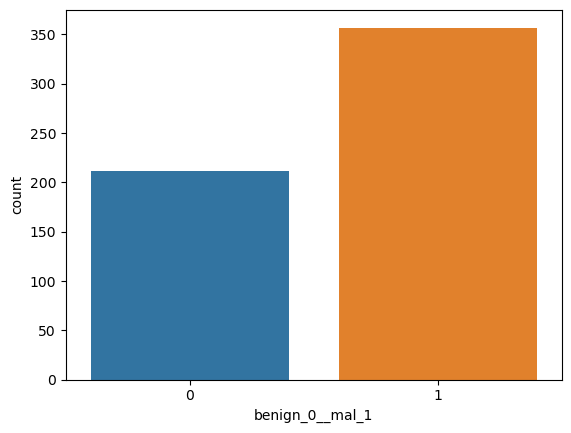

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)   # benign 0 or malignant 1
plt.show()   

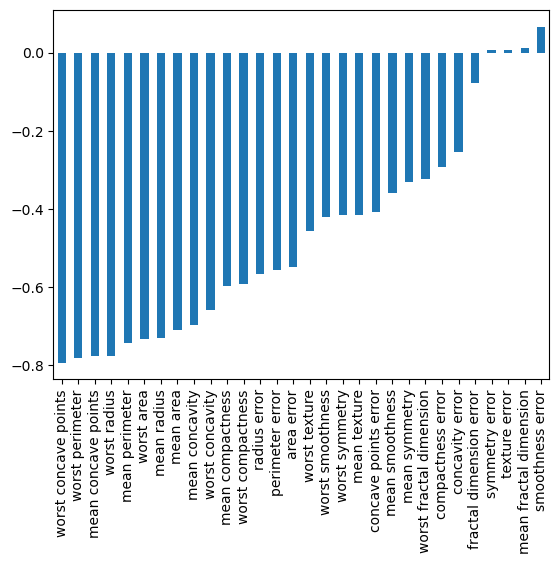

In [6]:
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar');

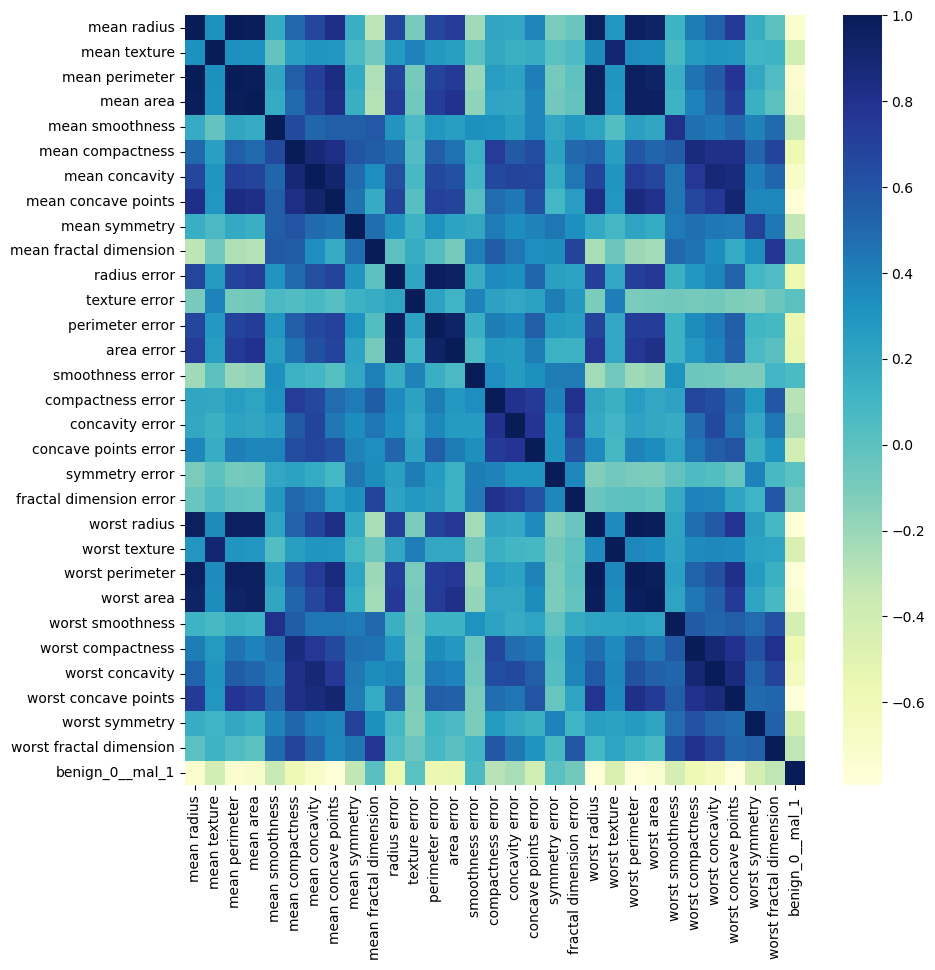

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), fmt='g', cmap='YlGnBu')
plt.show()

In [8]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

### Splitting the data set into train and test sets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [11]:
X_train.shape

(426, 30)

In [12]:
X_test.shape

(143, 30)

### Data Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_test_scaled = scaler.transform(X_test)

## Random Forest Classification

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf_rf = RandomForestClassifier(class_weight='balanced')
clf_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced')

In [18]:
y_pred_test = clf_rf.predict(X_test_scaled)
y_pred_test

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_true=y_test, y_pred=y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        52
   Malignant       1.00      0.98      0.99        91

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



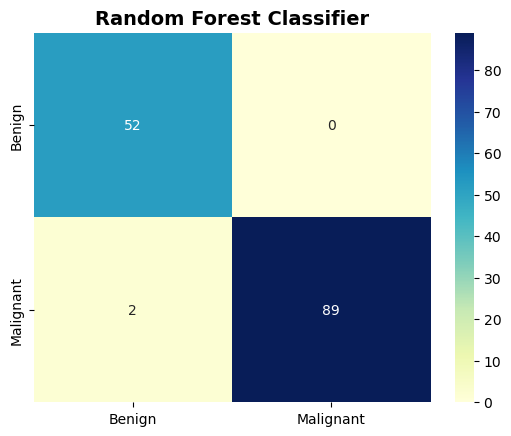

In [21]:
labels = [0,1]
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_test, labels=labels)
classes = ['Benign', 'Malignant']
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(df_cm, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Random Forest Classifier', fontdict={'fontsize':14, 'weight': 'bold'})
plt.show()

## Neural Network Classification

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [25]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))     

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
model.fit(x=X_train_scaled, y=y_train, epochs=600, validation_data=(X_test_scaled,y_test),
          callbacks=[early_stop])

Epoch 1/600

14/14 [==============================] - 1s 25ms/step - loss: 0.6960 - val_loss: 0.6845
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6952 - val_loss: 0.6696
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6712 - val_loss: 0.6549
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6594 - val_loss: 0.6396
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6433 - val_loss: 0.6206
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6176 - val_loss: 0.5951
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6136 - val_loss: 0.5699
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5689 - val_loss: 0.5363
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5664 - val_loss: 0.5060
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5305 - val_loss: 0.4802
Epoch 1

Epoch 81/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1130 - val_loss: 0.0895
Epoch 82/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1028 - val_loss: 0.0861
Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1096 - val_loss: 0.0848
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1180 - val_loss: 0.0844
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1152 - val_loss: 0.0843
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1211 - val_loss: 0.0848
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1103 - val_loss: 0.0856
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0988 - val_loss: 0.0883
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1370 - val_loss: 0.0889
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1142 - val_loss: 0.0884


In [27]:
model_loss = pd.DataFrame(model.history.history)

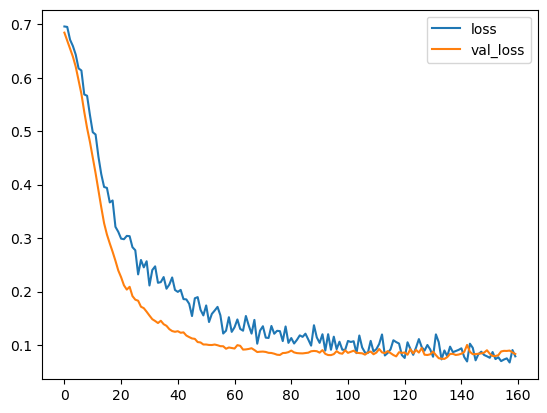

In [28]:
model_loss.plot();

In [29]:
predictions = np.round(model.predict(X_test_scaled)).astype('int')

5/5 [==============================] - 0s 2ms/step


In [30]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.98      0.99      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



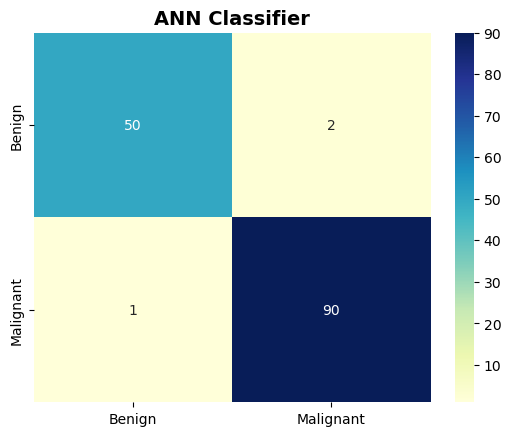

In [31]:
labels = [0,1]
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=labels)
classes = ['Benign', 'Malignant']
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(df_cm, annot=True, fmt='g', cmap='YlGnBu')
plt.title('ANN Classifier', fontdict={'fontsize':14, 'weight': 'bold'})
plt.show()